['setosa' 'versicolor' 'virginica']
(150, 4)
(105, 4)
(45, 4)
Confusion Matrix:
[[15  0  0]
 [ 0 10  0]
 [ 0  1 19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

virginicia
virginicia


/home/julio/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/julio/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

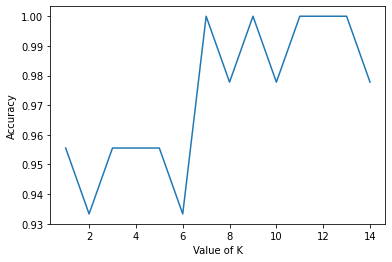

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target_names)
print(iris.data.shape)
X = iris.data[:, :4]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1],[4,3,1.3,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])